# This is the first Attempt




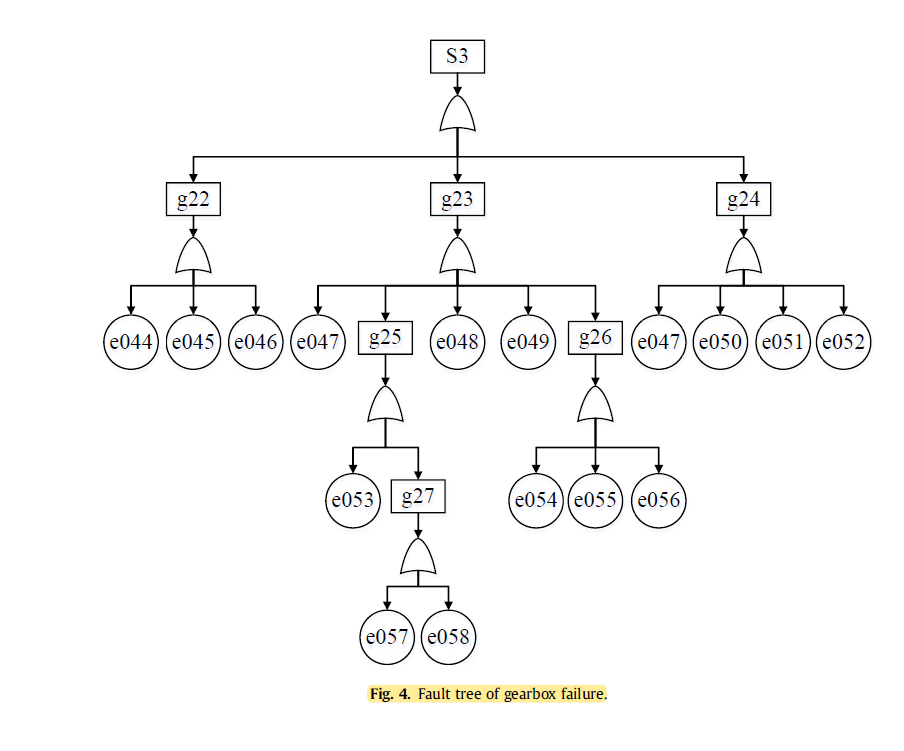


Trial method make a tree:

In [1]:
# #!/usr/bin/env python
# class Tree(object):

#     def __init__(self):
#         self.left = None
#         self.child = []
#         self.data = []

#     def createChildren(self,amount):
#         for i in range(0,amount):
#             self.child.append(Tree())
    
#     def setChildrenValues(self,list):
#         for i in range(0,len(list)):
#             self.data.append(list[i])

# root = Tree()
# root.createChildren(1)
# root.setChildrenValues(["F"])
# root.child[0].createChildren(3)
# root.child[0].setChildrenValues(["M1","M2","M3"])
# root.child[0].child[0].createChildren(3)
# root.child[0].child[0].setChildrenValues(["B0","B1","B3"])
# root.child[0].child[1].createChildren(5)
# root.child[0].child[1].setChildrenValues(["B4","I1","B5","B6","I2"])
# root.child[0].child[1].child[1].createChildren(2)
# root.child[0].child[1].child[1].setChildrenValues(["B9","I3"])
# root.child[0].child[2].createChildren(4)
# root.child[0].child[2].setChildrenValues(["B4","B7","B8","B8"])


# # print some values in the tree
# print(root.data[0])
# print(root.child[0].data[0])

In the loop below the 'label' term means that name that appears on the node

In [2]:
# from graphviz import Digraph
# def visualize_tree(tree):
#     def add_nodes_edges(tree, dot=None):
#         # Create Digraph object
#         if dot is None:
#             dot = Digraph()
#             dot.node(name=str(tree.data[0]), label=str(tree.data[0]))

#         # Add nodes
#         for x in range(len(tree.data)):
#             for y in range(len(tree.child[x].data)):
#                 dot.node(name=str(tree.child[x].data[y]) ,label=str(tree.child[x].data[y]))
#                 dot.edge(str(tree.data[x]), str(tree.child[x].data[y]))
#                 dot = add_nodes_edges(tree.child[x], dot=dot)

# #                 display(x)   
# #                 display(x)            
#         return dot
    
#     # Add nodes recursively and create a list of edges
#     dot = add_nodes_edges(tree)

#     # Visualize the graph
#     display(dot)

    
#     return dot
    
# dot = visualize_tree(root)

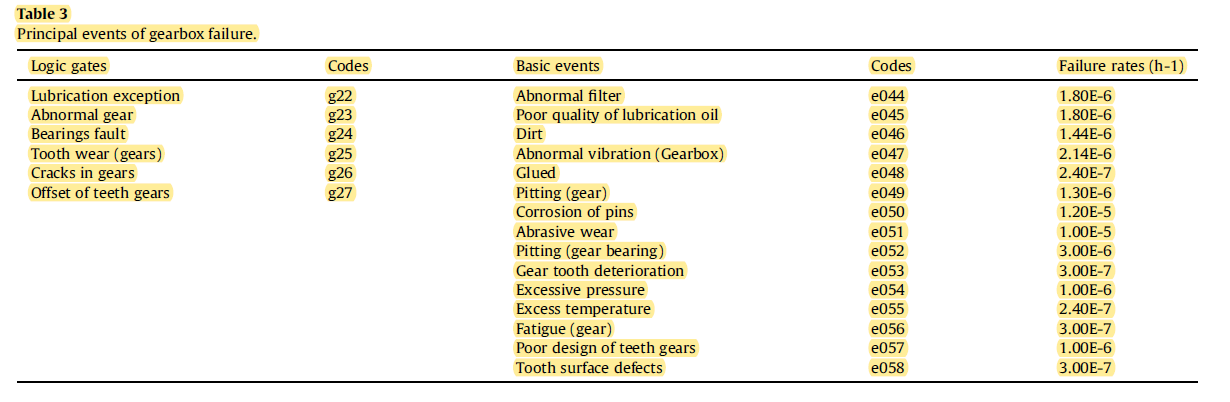

In [3]:
import numpy as np
lbls = np.array(["F","M1","M2","M3","B4","B5","B6","B7","I8","B9","B10","I11","B12","B13","B14","B15","I16","B17","B18","B19","B20","B21"])
lbls_name = np.array(["Gearbox Failure","Lubrication Exception","Abnormal Gear","Bearins Fault","Abnormal Filter",
                     "Poor Quality of lubrication oil","Dirt","Abnormal Vibration","Tooth Wear","Glued","Gear Pitting",
                     "Cracks in Gear","Corrosion of Pins","Abrasive Wear","Bearing Pitting","gear tooth Deteriotian",
                     "Offset of teeth gears","Excessive Pressure","Exces temperature","Gear Fatigue","Poor design gear teeth",
                     "Tooth surface defects"])


f0=np.zeros(len(lbls))
f0[1]=f0[2]=f0[3]=1

m1=np.zeros(len(lbls))
m1[4]=m1[5]=m1[6]=1

m2=np.zeros(len(lbls))
m2[7]=m2[8]=m2[9]=m2[10]=m2[11]=1

m3=np.zeros(len(lbls))
m3[7]=m3[12]=m3[13]=m3[14]=1

i8=np.zeros(len(lbls))
i8[15]=i8[16]=1

i11=np.zeros(len(lbls))
i11[17]=i11[18]=i11[19]=1

i16=np.zeros(len(lbls))
i16[20]=i16[21]=1

matrix=np.zeros((len(lbls),len(lbls)))
matrix[0,:]=f0
matrix[1,:]=m1
matrix[2,:]=m2
matrix[3,:]=m3
matrix[8,:]=i8
matrix[11,:]=i11
matrix[16,:]=i16

# display(matrix)


In [4]:
temp_variables=np.transpose([lbls,lbls_name])
for line in temp_variables:
    print(*line)

F Gearbox Failure
M1 Lubrication Exception
M2 Abnormal Gear
M3 Bearins Fault
B4 Abnormal Filter
B5 Poor Quality of lubrication oil
B6 Dirt
B7 Abnormal Vibration
I8 Tooth Wear
B9 Glued
B10 Gear Pitting
I11 Cracks in Gear
B12 Corrosion of Pins
B13 Abrasive Wear
B14 Bearing Pitting
B15 gear tooth Deteriotian
I16 Offset of teeth gears
B17 Excessive Pressure
B18 Exces temperature
B19 Gear Fatigue
B20 Poor design gear teeth
B21 Tooth surface defects


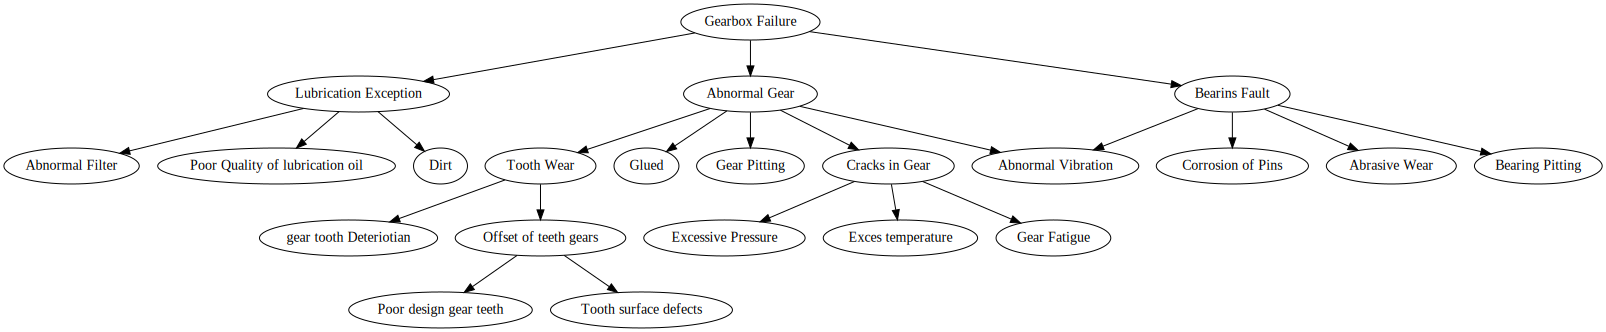

In [5]:
from graphviz import Digraph
dot=Digraph()
for x in range(len(lbls)):
    for y in range(len(lbls)):
        if matrix[x,y] == 1:
            dot.edge(str(lbls_name[x]),str(lbls_name[y]))    
display(dot)

In [6]:
def tabular_rep(lbls,matrix):
    lbls2 = np.append([""],lbls)
    lbls3 = np.resize(lbls2,(len(lbls2),1))

    from tabulate import tabulate
    table1 = np.vstack((lbls,matrix))
    table2 = np.hstack((lbls3,table1))
    print(tabulate(table2))

# tabular_rep(lbls,matrix)

'prob' is the aranged array of basic probabilities it will in future contain all the probailities for even the intermidiatery and failure modes 

In [7]:
basic_index=np.array([4,5,6,7,9,10,12,13,14,15,17,18,19,20,21])
for x in basic_index:
    matrix[x,x]=1

tabular_rep(lbls,matrix)

# 10**-6
basic_prob=np.array([1.8,1.8,1.44,2.14,0.24,1.3,12,10,3,0.3,1,0.24,0.3,1,0.3])
i=10**-6
basic_prob=basic_prob*i
display(basic_prob)

temp=np.count_nonzero(matrix,axis=1)
prob=np.zeros(len(matrix))
i=0
for x in range(len(matrix)):
    if temp[x]==1:
        prob[x]=basic_prob[i]
        i=i+1
display(prob)


---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---
     F    M1   M2   M3   B4   B5   B6   B7   I8   B9   B10  I11  B12  B13  B14  B15  I16  B17  B18  B19  B20  B21
F    0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
M1   0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
M2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
M3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
B4   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
B5   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
B6   0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

array([1.80e-06, 1.80e-06, 1.44e-06, 2.14e-06, 2.40e-07, 1.30e-06,
       1.20e-05, 1.00e-05, 3.00e-06, 3.00e-07, 1.00e-06, 2.40e-07,
       3.00e-07, 1.00e-06, 3.00e-07])

array([0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.80e-06, 1.80e-06,
       1.44e-06, 2.14e-06, 0.00e+00, 2.40e-07, 1.30e-06, 0.00e+00,
       1.20e-05, 1.00e-05, 3.00e-06, 3.00e-07, 0.00e+00, 1.00e-06,
       2.40e-07, 3.00e-07, 1.00e-06, 3.00e-07])

In [8]:
def calc_failure(mat,prob):
    rev_mat=np.copy(mat[::-1])
#     display(prob)
    prob_tem=np.copy(prob)
    tem=np.zeros(len(rev_mat))
    for x in range(len(rev_mat)):
        tem=prob_tem*rev_mat[x]
        prob_tem[len(rev_mat)-x-1]=1-np.prod(1-tem)
    prob_final=np.copy(prob_tem)
    
    return prob_final

failureRate=calc_failure(matrix,prob)
failureRate

array([3.89993769e-05, 5.03999158e-06, 6.81998107e-06, 2.71397605e-05,
       1.80000000e-06, 1.80000000e-06, 1.44000000e-06, 2.14000000e-06,
       1.59999931e-06, 2.40000000e-07, 1.30000000e-06, 1.53999939e-06,
       1.20000000e-05, 1.00000000e-05, 3.00000000e-06, 3.00000000e-07,
       1.29999970e-06, 1.00000000e-06, 2.40000000e-07, 3.00000000e-07,
       1.00000000e-06, 3.00000000e-07])

In [9]:
ratios_temp= np.concatenate((failureRate[7:8],failureRate[12:15]))
ratios= 100*ratios_temp/np.sum(ratios_temp)
ratios #ratio of failure mode failurer rates

array([ 7.88504053, 44.21518055, 36.84598379, 11.05379514])

In [10]:
components=np.array(["Bearing","Bearing Lube","Gears","Gear Lube","Others"])

RIF_bearing = np.array(["Bearing Design","Material Hardness", "Material Quality" , "Surface Hardness"])
bearing_causeMat=[[14],[12],[14],[14]]


RIF_bearinglube = np.array(["Grease Quality", "Contamination"])
bearinglube_causeMat=[[12,13],[13]]


RIF_gear = np.array(["Gear Design","Surface Roughness","Surface Hardness", "Material Quality"])
gear_causeMat=[[19,20,21],[15],[15],[15,19,21]]


RIF_gearlube = np.array(["Lubricant Quality"])
gearlube_causeMat=[[9,15,18]]


RIF_others = np.array(["External Vibration", "Temperature" , "Environment", "Filter Design"])
others_causeMat=[[7,9],[5,18],[4,5,12],[4]]

allRIFs=[RIF_bearing,RIF_bearinglube,RIF_gear,RIF_gearlube,RIF_others]
causemat=[bearing_causeMat,bearinglube_causeMat,gear_causeMat,gearlube_causeMat,others_causeMat]

In [11]:
print(lbls)
print(basic_index)

print(lbls[basic_index])


['F' 'M1' 'M2' 'M3' 'B4' 'B5' 'B6' 'B7' 'I8' 'B9' 'B10' 'I11' 'B12' 'B13'
 'B14' 'B15' 'I16' 'B17' 'B18' 'B19' 'B20' 'B21']
[ 4  5  6  7  9 10 12 13 14 15 17 18 19 20 21]
['B4' 'B5' 'B6' 'B7' 'B9' 'B10' 'B12' 'B13' 'B14' 'B15' 'B17' 'B18' 'B19'
 'B20' 'B21']


In [12]:
# # class cause:
# #     def __init__(se)
# class RIF:
#     def __init__(self,component,RIF,lbls,cause_mat):
#         self.component=component
#         self.RIF=RIF
#         self.RIFcause=[None]*len(RIF)
#         self.RIFcauseindex = [0]*len(RIF)
#         for x in range(len(self.RIF)):
#             self.RIFcause[x]=lbls[cause_mat[x]]
#             self.RIFcauseindex[x]=cause_mat[x]

# bearing = RIF("Bearing",RIF_bearing, lbls,bearing_causeMat)
# bearinglube = RIF("Bearing Lubricant",RIF_bearinglube, lbls, bearinglube_causeMat)
# gear = RIF("Gears",RIF_gear, lbls, gear_causeMat)
# gearlube = RIF("Gear Lubricant",RIF_gearlube, lbls, gearlube_causeMat)
# others = RIF("Others",RIF_others, lbls, others_causeMat)

# print(gear.component)
# print(gear.RIF[0])
# print(gear.RIFcause[1])


In [13]:
class cause:
    def __init__(self,RIFname,cause_arr,lbls_name):
        self.name=RIFname
        self.cause=lbls_name[cause_arr]
        self.causeindex=cause_arr
        self.causechange=np.ones(len(cause_arr))
class RIF:
    def __init__(self,component,RIF,lbls_name,cause_mat):
        self.name=component
        self.allRIFs=RIF
        self.RIF=[None]*len(RIF)
        for x in range(len(self.RIF)):
            self.RIF[x]=cause(RIF[x],cause_mat[x],lbls_name)

            
components=np.array(["Bearing","Bearing Lube","Gears","Gear Lube","Others"])
component= [None]*len(components)
for x in range((len(components))):
    component[x]=RIF(components[x],allRIFs[x], lbls_name,causemat[x])
    
# bearing = RIF("Bearing",RIF_bearing, lbls_name,bearing_causeMat)
# bearinglube = RIF("Bearing Lubricant",RIF_bearinglube, lbls_name, bearinglube_causeMat)
# gear = RIF("Gears",RIF_gear, lbls_name, gear_causeMat)
# gearlube = RIF("Gear Lubricant",RIF_gearlube, lbls_name, gearlube_causeMat)
# others = RIF("Others",RIF_others, lbls_name, others_causeMat)

print(causemat)
# print(component[1].name)
# print(component[0].allRIFs[0])
for x in range(len(component)):
    for y in range((len(component[x].allRIFs))):
        print(component[x].RIF[y].cause)




[[[14], [12], [14], [14]], [[12, 13], [13]], [[19, 20, 21], [15], [15], [15, 19, 21]], [[9, 15, 18]], [[7, 9], [5, 18], [4, 5, 12], [4]]]
['Bearing Pitting']
['Corrosion of Pins']
['Bearing Pitting']
['Bearing Pitting']
['Corrosion of Pins' 'Abrasive Wear']
['Abrasive Wear']
['Gear Fatigue' 'Poor design gear teeth' 'Tooth surface defects']
['gear tooth Deteriotian']
['gear tooth Deteriotian']
['gear tooth Deteriotian' 'Gear Fatigue' 'Tooth surface defects']
['Glued' 'gear tooth Deteriotian' 'Exces temperature']
['Abnormal Vibration' 'Glued']
['Poor Quality of lubrication oil' 'Exces temperature']
['Abnormal Filter' 'Poor Quality of lubrication oil' 'Corrosion of Pins']
['Abnormal Filter']


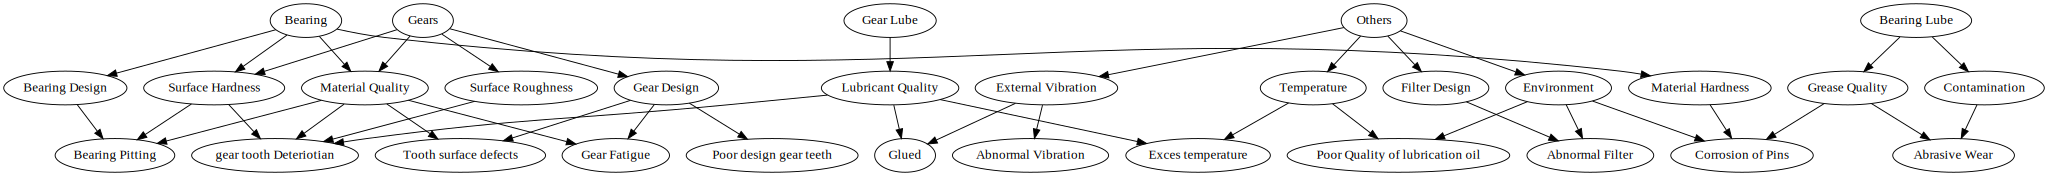

In [14]:
from graphviz import Digraph
dot2=Digraph()
for x in range(len(component)):
    for y in range(len(component[x].allRIFs)):
        dot2.edge(component[x].name,component[x].allRIFs[y])
        for z in range(len(component[x].RIF[y].cause)):
            dot2.edge(component[x].allRIFs[y],component[x].RIF[y].cause[z])
display(dot2)

In [17]:
print('Welcome to the WT Gearbox relibilitiy prediction interface')

print('Please select one of the following components- 0:Bearing , 1:BearingLube, 2:Gear, 3:GearLube, 4:others ')
input_part=int(input('Selected part(use numbers): '))
print('You selected: ',component[input_part].name)
print('Selected part has the following properties to vary: ' , component[input_part].allRIFs)
input_prop=int(input('Select property to calculate effect(use numbers from 0): '))
print('You selected: ' , component[input_part].RIF[input_prop].name)
print('Selected property affects: ', component[input_part].RIF[input_prop].cause)
input_cause=int(input('Select cause you want to change(use numbers): '))
input_change=int(input('change by(in percentage): '))

Welcome to the WT Gearbox relibilitiy prediction interface
Please select one of the following components- 0:Bearing , 1:BearingLube, 2:Gear, 3:GearLube, 4:others 
Selected part(use numbers): 1
You selected:  Bearing Lube
Selected part has the following properties to vary:  ['Grease Quality' 'Contamination']
Select property to calculate effect(use numbers from 0): 0
You selected:  Grease Quality
Selected property affects:  ['Corrosion of Pins' 'Abrasive Wear']
Select cause you want to change(use numbers): 1
change by(in percentage): 5


In [31]:
#this part would tell me what probability to change and how much

# changed_basiccause_index=component[input_part].RIF[input_prop].causeindex[input_cause]
# changed_basiccause=component[input_part].RIF[input_prop].cause[input_cause]
# print(changed_basiccause_index)
# print(changed_basiccause)

changed_basiccause_index=20
input_change=10

prob_updated=np.copy(prob)
prob_updated[changed_basiccause_index]=prob_updated[changed_basiccause_index]*input_change/100;
print(prob_updated)

failureRate_updated=calc_failure(matrix,prob_updated)
print(failureRate[0])
print(failureRate_updated[0])
improvement=(failureRate[0]-failureRate_updated[0])/failureRate[0]*100
print(improvement)


[0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.80e-06 1.80e-06 1.44e-06 2.14e-06
 0.00e+00 2.40e-07 1.30e-06 0.00e+00 1.20e-05 1.00e-05 3.00e-06 3.00e-07
 0.00e+00 1.00e-06 2.40e-07 3.00e-07 1.00e-07 3.00e-07]
3.8999376899329086e-05
3.809941109866877e-05
2.3076414861279506
